<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Daily_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


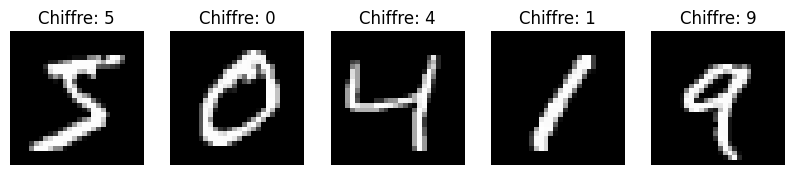

In [1]:
# 1. Import des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 2. Chargement et prétraitement des données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding des labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Affichage de quelques exemples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Chiffre: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()


In [3]:
# 3. Construction du réseau de neurones
model = keras.Sequential([
    keras.Input(shape=(28, 28)),  # Spécification explicite de l'entrée
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Affichage de la structure du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8623 - loss: 0.4713 - val_accuracy: 0.9535 - val_loss: 0.1514
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9640 - loss: 0.1174 - val_accuracy: 0.9628 - val_loss: 0.1284
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9729 - val_loss: 0.0911
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9732 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9722 - val_loss: 0.0943
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9908 - loss: 0.0282 - val_accuracy: 0.9756 - val_loss: 0.0944
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9935 - loss: 0.02

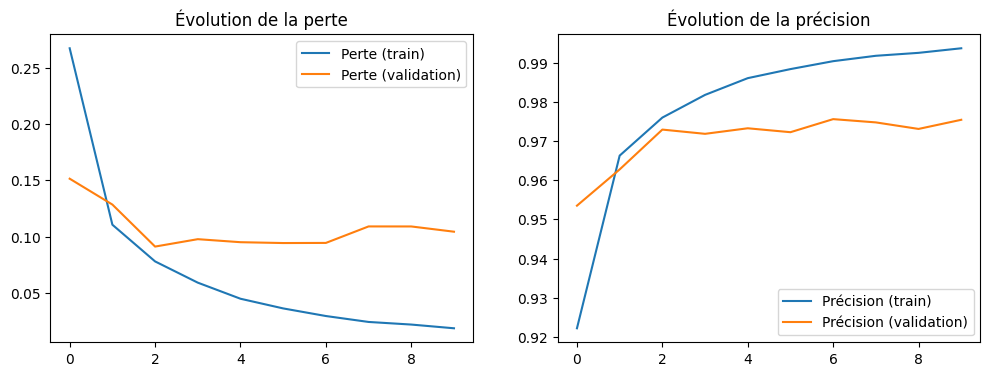

In [4]:
# 4. Entraînement du modèle
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

# Visualisation de l'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (train)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Évolution de la perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision (train)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Évolution de la précision')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9731 - loss: 0.1093

Précision sur le jeu de test: 0.9764
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


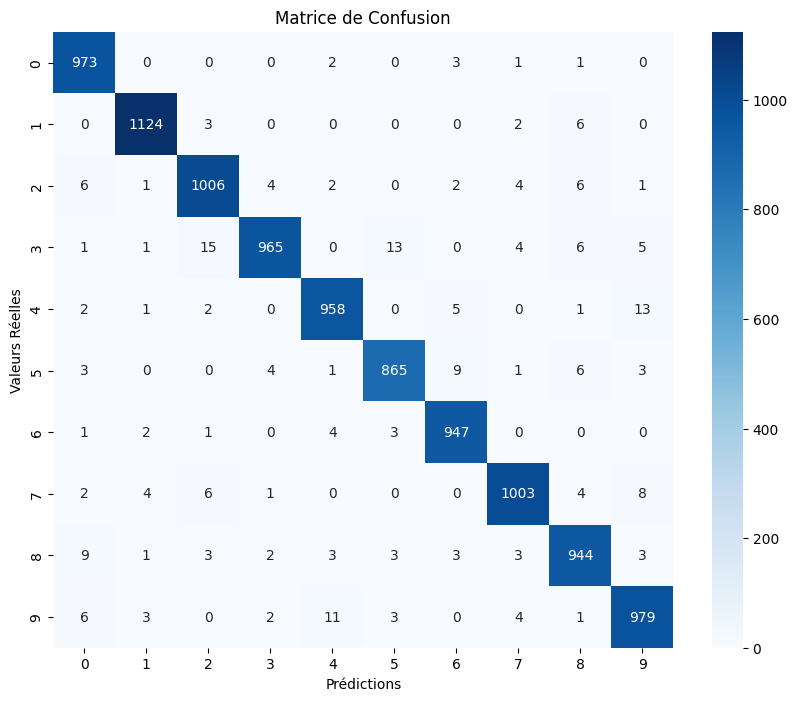


Analyse des erreurs par chiffre:
Chiffre 0: 0.71% d'erreurs
Chiffre 1: 0.97% d'erreurs
Chiffre 2: 2.52% d'erreurs
Chiffre 3: 4.46% d'erreurs
Chiffre 4: 2.44% d'erreurs
Chiffre 5: 3.03% d'erreurs
Chiffre 6: 1.15% d'erreurs
Chiffre 7: 2.43% d'erreurs
Chiffre 8: 3.08% d'erreurs
Chiffre 9: 2.97% d'erreurs


In [5]:
# 5. Évaluation du modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nPrécision sur le jeu de test: {test_accuracy:.4f}")

# Prédictions sur le jeu de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Analyse des erreurs
errors = y_test_classes != y_pred_classes
print("\nAnalyse des erreurs par chiffre:")
for digit in range(10):
    digit_errors = errors & (y_test_classes == digit)
    error_rate = digit_errors.sum() / (y_test_classes == digit).sum()
    print(f"Chiffre {digit}: {error_rate:.2%} d'erreurs")



Chiffre 3 : 4.46% d'erreurs

Le plus problématique, avec presque 4.5% d'erreurs

Chiffre 8 : 3.08% d'erreurs

Chiffre 5 : 3.03% d'erreurs

Chiffre 9 : 2.97% d'erreurs


Les chiffres les mieux reconnus :

Chiffre 0 : 0.71% d'erreurs

Chiffre 1 : 0.97% d'erreurs

Chiffre 6 : 1.15% d'erreurs